<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [256]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [3]:
# A:
df = pd.read_csv(sac_csv)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
# Basic EDA can be summed down to:
# Source: https://en.wikipedia.org/wiki/Exploratory_data_analysis#:~:text=In statistics%2C exploratory data analysis,modeling or hypothesis testing task.&text=EDA encompasses IDA.

# First Initial Data Analysis (IDA):

# Answer these 4 questions:

# Check the quality of data

# Check the quality of measurments

# Do any type of initial transformations

# Did the collected data fufill the intentions of the research design
## Eg: background and substantive variables are equally distributed within and across groups.
## Eg: check the success of the non-random sampling, by Checking if all subgroups in population are represented
## Eg: check for dropout

# Then EDA:
# Summarize their main characteristics, often with visual methods
# EDA is mostly seeing what data can tell the user beyond formal modeling or hypothesis testing 
# 
# Typical Graphical EDA: 
# Boxplot, Histogram, Multivariate Chart, Scatter Plots, Run Charts, Targeted Projection Pursuit

In [5]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


NoneType

In [6]:
pd.DataFrame(df.isnull().sum())

,0
street,0
city,0
zip,0
state,0
beds,0
baths,0
sq__ft,0
type,0
sale_date,0
price,0


In [7]:
pd.DataFrame(df.dtypes)

,0
street,object
city,object
zip,int64
state,object
beds,int64
baths,int64
sq__ft,int64
type,object
sale_date,object
price,int64


In [8]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [9]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [10]:
df[df['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [11]:
# Boolean masking
# https://www.geeksforgeeks.org/boolean-indexing-in-pandas/#:~:text=In a dataframe we can,pass a boolean value True.

In [12]:
df.copy()[df['sq__ft'] < 0][['sq__ft', 'price']] * -1

,sq__ft,price
703,984,210944


In [13]:
df.loc[703, 'sq__ft'] = df.loc[703, 'sq__ft'] * -1

In [14]:
df.loc[703, 'price'] =  df.loc[703, 'price'] * -1

In [15]:
df[df['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [16]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.445121,-121.193371
std,85.176072,1.307932,0.895371,853.048243,138365.839085,5.103637,5.100670
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [17]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [18]:
df['zip'].value_counts()

95648    72
95823    61
95828    45
95758    44
95838    37
         ..
95633     1
95635     1
95655     1
95690     1
95722     1
Name: zip, Length: 68, dtype: int64

In [19]:
df['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [20]:
# I would want to do city but the data is biased towards sacramento

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [21]:
# A: Zip code, total rooms, sq__ft, 

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [22]:
df['total_rooms'] = df['beds'] + df['baths']

In [23]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,total_rooms
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,3
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,4
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,3
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,3
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,3


In [24]:
df[['zip', 'sq__ft', 'total_rooms']]

,zip,sq__ft,total_rooms
0,95838,836,3
1,95823,1167,4
2,95815,796,3
3,95815,852,3
4,95824,797,3
...,...,...,...
980,95829,2280,7
981,95823,1477,5
982,95610,1216,5
983,95758,1685,6


In [25]:
df['price']

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

In [26]:
X = df[['zip', 'sq__ft', 'total_rooms']]

In [27]:
y = df['price']

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [28]:
# SLR = Simple Linear Regression

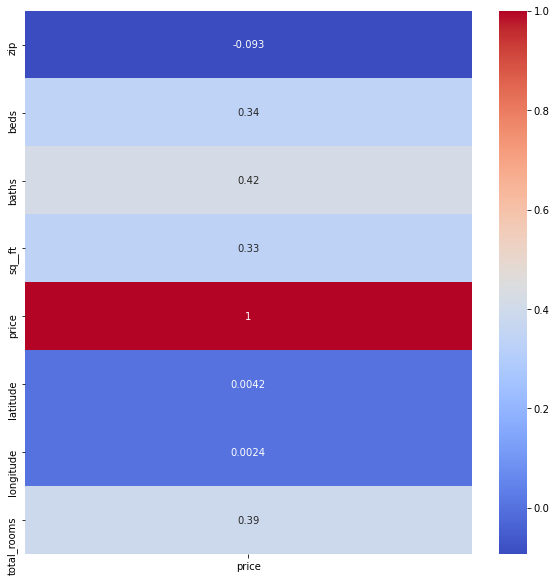

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['price']], annot=True, cmap='coolwarm')

In [30]:
# Using a quick correlation and a heatmap with all variables, I don't see anythign immediately that can help us
# Total rooms has a correlation of .39 to price
# sq__ft has a correlation of .33 to price
# my assumption of zip code being a correlator is actually bad, because it has a corr value of -0.093
# Baths seems to be a stronger correlator of price than total rooms
# We can make an assumption that each bathroom may be associated with a bedroom or standalone

In [31]:
# What happens when i include dummy variables for city?

In [32]:
dummy_df = pd.get_dummies(df)

In [33]:
dummy_df.head(1)

,zip,beds,baths,sq__ft,price,latitude,longitude,total_rooms,street_1 KENNELFORD CIR,street_10 SEA FOAM CT,...,state_CA,type_Condo,type_Multi-Family,type_Residential,type_Unkown,sale_date_Fri May 16 00:00:00 EDT 2008,sale_date_Mon May 19 00:00:00 EDT 2008,sale_date_Thu May 15 00:00:00 EDT 2008,sale_date_Tue May 20 00:00:00 EDT 2008,sale_date_Wed May 21 00:00:00 EDT 2008
0,95838,2,1,836,59222,38.631913,-121.434879,3,0,0,...,1,0,0,1,0,0,0,0,0,1


In [34]:
dummy_df.corr()[['price']].sort_values(by='price', ascending=False).head(5)

,price
price,1.000000
baths,0.416208
total_rooms,0.387460
beds,0.342024
sq__ft,0.333897


In [35]:
#plt.figure(figsize=(10,300));
#sns.heatmap(dummy_df.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm');
#plt.savefig('df_corr.png');

In [36]:
# Okay, so according to the correlations, the first 5 dataframe, and the massive output picture if you'd like to look at
# We should focus on
# baths OR total rooms OR bed
## all of those numbers mean the same thing and we should only consider one of them
# sq__ft

In [ ]:
# For my evaluation, I am going to set up two datasets
# X_simple = ['total_rooms', sq__ft]
# X_everything = dummy_df.drop('baths', 'beds')
# y =['price']

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [55]:
# SSE = Sum of Squares Error

In [101]:
X_simple = df.loc[:,['total_rooms', 'sq__ft']]
#X_everything = dummy_df.drop(['baths', 'beds'], axis=1)
y = df['price']

In [52]:
X_simple.head(2)

,total_rooms,sq__ft
0,3,836
1,4,1167


In [54]:
y.head(2)

0    59222
1    68212
Name: price, dtype: int64

In [ ]:
# A: Using a Linear Regression Model

In [57]:
lr_simple = LinearRegression()

In [58]:
lr_simple.fit(X=X_simple, y=y)

LinearRegression()

### 6. Interpret the intercept. Interpret the slope.

In [ ]:
# A: Looking at intercept attribute

In [61]:
lr_simple.intercept_

115698.00517258947

In [70]:
# Source : https://www.kite.com/python/answers/how-to-print-a-numpy-array-without-scientific-notation-in-python
np.set_printoptions(suppress=True) # This is to see the number as a whole and not scientific notation
lr_simple.coef_ 

array([19758.4398132 ,    19.63034841])

In [ ]:
# The lr_simple intercept is saying  that its starting price for houses in the Sacrarmento area
# is around 115,000 USD

In [93]:
X_simple.columns

Index(['total_rooms', 'sq__ft'], dtype='object')

In [ ]:
# The slopes of the multivarate linear regression say that the total rooms have a much larger effect on the pricing than the sq__ft do

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [104]:
# Source: https://stats.stackexchange.com/questions/244017/what-is-the-difference-between-prediction-and-inference#:~:text=Inference%3A%20Given%20a%20set%20of,from%20a%20set%20of%20outcomes.
'''
Inference: Given a set of data you want to infer how the output is generated as a function of the data.

Prediction: Given a new measurement, you want to use an existing data set to build a model that reliably 
chooses the correct identifier from a set of outcomes.

Inference: You want to find out what the effect of Age, Passenger Class and, Gender has on surviving the Titanic Disaster. 
You can put up a logistic regression and infer the effect each passenger characteristic has on survival rates.

Prediction: Given some information on a Titanic passenger, 
you want to choose from the set {lives,dies} and be correct as often as possible. 
(See bias-variance tradeoff for prediction in case you wonder how to be correct as often as possible.)
''';

In [ ]:
# A: For the lr_simple model
# We can infer that there is a relationship between price and total rooms, and our coefficents say 

# Then, we can set up a prediction that a house in SACRAMENTO with an x amount of rooms would be predicted to have a 
# Y price

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [105]:
# A:

# We calculate residuials by using our lr_simple model to predict y values, then find the difference between predicted and actual+

In [107]:
# We pass in X because we are predicting y
preds_simple = lr_simple.predict(X_simple)

In [108]:
residuials_simple = y - preds_simple

Text(0.5, 0, 'Index')

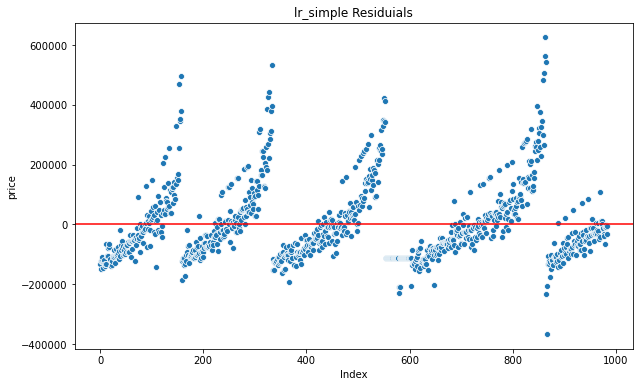

In [147]:
plt.figure(figsize=(10,6))
plt.title('lr_simple Residuials')
plt.axhline(color = 'red')
sns.scatterplot(range(len(residuials_simple)), residuials_simple)
plt.xlabel('Index')

In [121]:
# What the heck is this? It looks like it has a log relationship

# What happens if we sort the predicted y_values?

In [131]:
residuials_simple_sorted = pd.Series(residuials_simple.sort_values())

In [132]:
residuials_simple_sorted

866   -366294.972306
865   -232697.644052
579   -229351.644052
580   -209593.204239
581   -209593.204239
           ...      
861    506801.994827
334    533354.790505
864    544409.383133
862    564301.994827
863    624992.916135
Name: price, Length: 985, dtype: float64

Text(0.5, 0, 'Index')

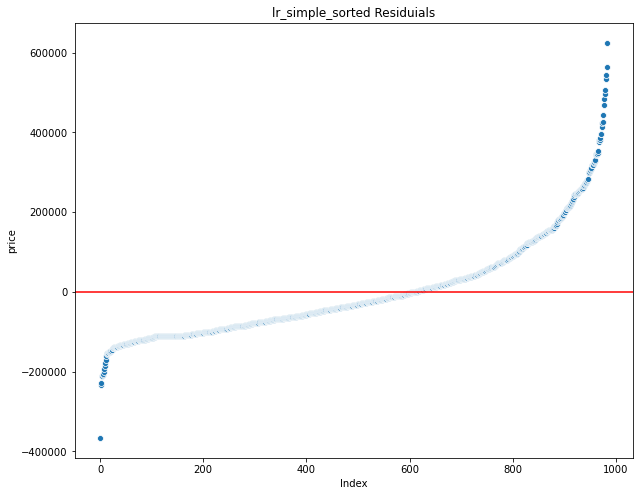

In [139]:
plt.figure(figsize=(10,8))
plt.title('lr_simple_sorted Residuials')
sns.scatterplot(range(len(residuials_simple_sorted)), residuials_simple_sorted)
plt.xlabel('Index')

In [136]:
# Sorting the values seems to take away any kind of information they had, but what if we use a log for our y scale?

In [137]:
# Plotting the orignal, unsorted data, but using a log scale:

Text(0.5, 0, 'Index')

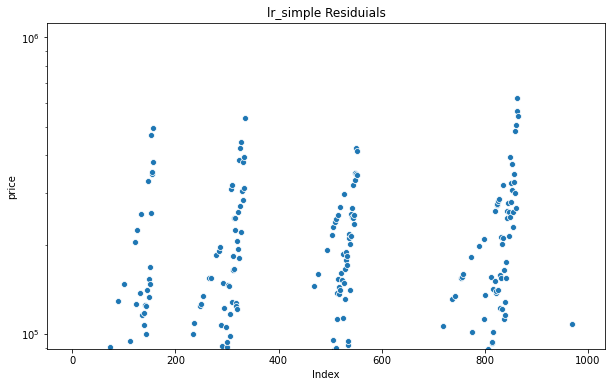

In [151]:
plt.figure(figsize=(10,6))
plt.title('lr_simple Residuials')
plt.axhline(color = 'red')
sns.scatterplot(range(len(residuials_simple)), residuials_simple)
plt
plt.yscale('log')
plt.xlabel('Index')

In [152]:
# I don't think the log tells us anything other than dividing the houses into 5 containers

In [ ]:
# I want to explore with the original plot because it reminds me of tan(x)

In [155]:
# To explore this, we are going to look at a new method called curve_fit
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [154]:
from scipy.optimize import curve_fit

In [157]:
X_simple.columns

Index(['total_rooms', 'sq__ft'], dtype='object')

In [182]:
# Let's see if we can superimpose our predictions onto the orignal graphs:

Text(0, 0.5, 'Actual Price')

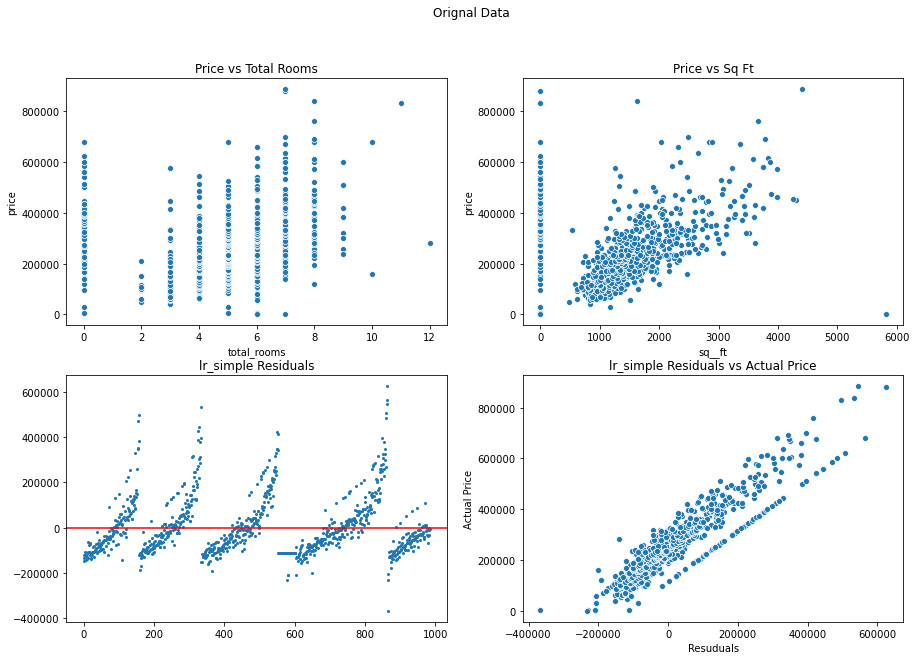

In [240]:
f, axs = plt.subplots(2, 2,figsize=(15,10))
plt.suptitle('Orignal Data')
plt.subplot(2, 2, 1)
sns.scatterplot(X_simple['total_rooms'], y)
plt.title('Price vs Total Rooms')
plt.subplot(2, 2, 2)
sns.scatterplot(X_simple['sq__ft'], y)
plt.title('Price vs Sq Ft')
plt.subplot(2, 2, 3)
plt.title('lr_simple Residuals')
plt.plot(residuials_simple, 'o', markersize=2)
plt.axhline(color = 'red')
plt.subplot(2, 2, 4)
plt.title('lr_simple Residuals vs Actual Price')
sns.scatterplot(residuials_simple, y)
plt.xlabel('Resuduals')
plt.ylabel('Actual Price')

In [180]:
# Okay, the obvious weird trend of data having a log looking relationship comes from the total rooms vs price variable

In [181]:
# It makes no sense to curvefit a tan(x)

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [204]:
# A:

# We did this earlier during variable exploration

In [205]:
X_everything = dummy_df.drop(['baths', 'beds'], axis=1)

In [206]:
X_everything.head()

,zip,sq__ft,price,latitude,longitude,total_rooms,street_1 KENNELFORD CIR,street_10 SEA FOAM CT,street_100 CHELSEA CT,street_100 CRYSTALWOOD CIR,...,state_CA,type_Condo,type_Multi-Family,type_Residential,type_Unkown,sale_date_Fri May 16 00:00:00 EDT 2008,sale_date_Mon May 19 00:00:00 EDT 2008,sale_date_Thu May 15 00:00:00 EDT 2008,sale_date_Tue May 20 00:00:00 EDT 2008,sale_date_Wed May 21 00:00:00 EDT 2008
0,95838,836,59222,38.631913,-121.434879,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,95823,1167,68212,38.478902,-121.431028,4,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,95815,796,68880,38.618305,-121.443839,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,95815,852,69307,38.616835,-121.439146,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,95824,797,81900,38.519470,-121.435768,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [208]:
# A:
X_everything.head()

,zip,sq__ft,price,latitude,longitude,total_rooms,street_1 KENNELFORD CIR,street_10 SEA FOAM CT,street_100 CHELSEA CT,street_100 CRYSTALWOOD CIR,...,state_CA,type_Condo,type_Multi-Family,type_Residential,type_Unkown,sale_date_Fri May 16 00:00:00 EDT 2008,sale_date_Mon May 19 00:00:00 EDT 2008,sale_date_Thu May 15 00:00:00 EDT 2008,sale_date_Tue May 20 00:00:00 EDT 2008,sale_date_Wed May 21 00:00:00 EDT 2008
0,95838,836,59222,38.631913,-121.434879,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,95823,1167,68212,38.478902,-121.431028,4,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,95815,796,68880,38.618305,-121.443839,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,95815,852,69307,38.616835,-121.439146,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,95824,797,81900,38.519470,-121.435768,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [212]:
X_everything.drop('type_Unkown', axis=1, inplace=True)

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [ ]:
# MLR = Multiple Linear Regression

In [213]:
X_everything.head()

,zip,sq__ft,price,latitude,longitude,total_rooms,street_1 KENNELFORD CIR,street_10 SEA FOAM CT,street_100 CHELSEA CT,street_100 CRYSTALWOOD CIR,...,state_AC,state_CA,type_Condo,type_Multi-Family,type_Residential,sale_date_Fri May 16 00:00:00 EDT 2008,sale_date_Mon May 19 00:00:00 EDT 2008,sale_date_Thu May 15 00:00:00 EDT 2008,sale_date_Tue May 20 00:00:00 EDT 2008,sale_date_Wed May 21 00:00:00 EDT 2008
0,95838,836,59222,38.631913,-121.434879,3,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,95823,1167,68212,38.478902,-121.431028,4,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,95815,796,68880,38.618305,-121.443839,3,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,95815,852,69307,38.616835,-121.439146,3,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,95824,797,81900,38.519470,-121.435768,3,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [218]:
X_everything.corr().sort_values(by='price', ascending=False).head(10)['price']

price                          1.000000
total_rooms                    0.387460
sq__ft                         0.333897
city_EL DORADO HILLS           0.287964
city_WILTON                    0.198005
city_GRANITE BAY               0.177687
city_FOLSOM                    0.173267
street_9401 BARREL RACER CT    0.149982
street_2982 ABERDEEN LN        0.148647
city_ROSEVILLE                 0.147922
Name: price, dtype: float64

In [ ]:
# Looking at the new correlation values and choosing the top 10
# I'm going to include a nondummy variable: sq__rt
# I'm going to choose my dummy variables: total_rooms, 
# I'm also going to choose dummy variables: type_Residential, type_Multi-Family, type_Condo

In [219]:
X_mlr = X_everything.loc[:, ['total_rooms', 'sq__ft', 'type_Condo', 'type_Multi-Family', 'type_Residential']]

In [221]:
X_mlr.head()

,total_rooms,sq__ft,type_Condo,type_Multi-Family,type_Residential
0,3,836,0,0,1
1,4,1167,0,0,1
2,3,796,0,0,1
3,3,852,0,0,1
4,3,797,0,0,1


In [222]:
y.head()

0    59222
1    68212
2    68880
3    69307
4    81900
Name: price, dtype: int64

In [ ]:
# Thankfully, we have kept the same Y for the entire analysis

In [223]:
model = LinearRegression()

In [224]:
model.fit(X=X_mlr, y=y)

LinearRegression()

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

In [226]:
price_predict = model.predict(X_mlr)

Text(0, 0.5, 'Actual Price')

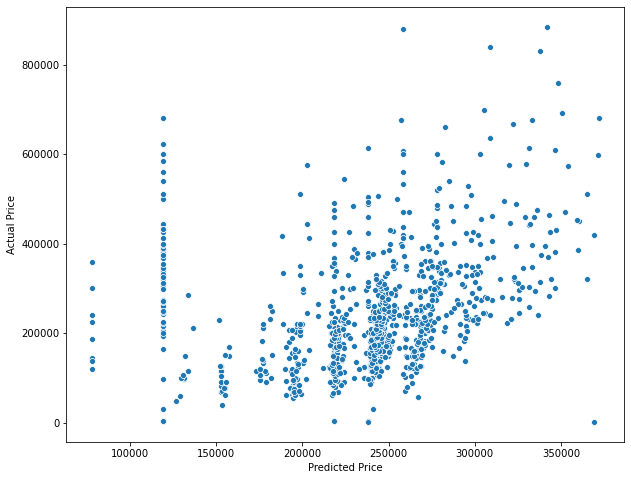

In [230]:
plt.figure(figsize=(10,8))
sns.scatterplot(price_predict, y)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

In [231]:
# What hapens when I omit total_rooms?

In [232]:
X_mlr_2 = X_everything.loc[:, ['sq__ft', 'type_Condo', 'type_Multi-Family', 'type_Residential']]

In [233]:
model_2 = LinearRegression()

In [234]:
model_2.fit(X=X_mlr_2, y=y)

LinearRegression()

In [235]:
price_predict_2 = model_2.predict(X_mlr_2)

Text(0, 0.5, 'Actual Price')

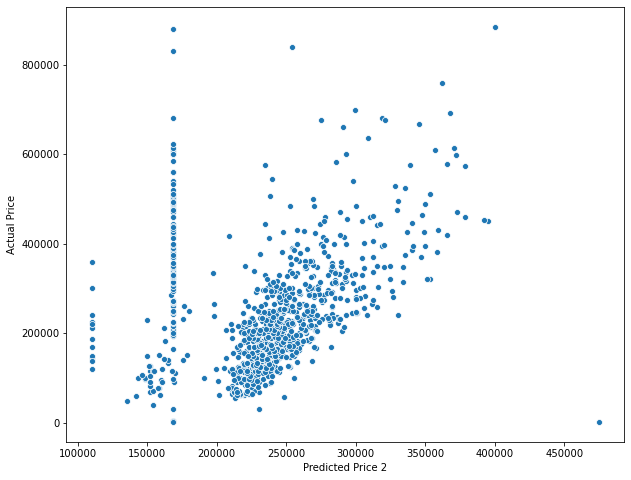

In [237]:
plt.figure(figsize=(10,8))
sns.scatterplot(price_predict_2, y)
plt.xlabel('Predicted Price 2')
plt.ylabel('Actual Price')

In [ ]:
# The general shape of the data still looks the same.

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

In [238]:
#  A:
'''
Source : https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/
Our 5 assumptions for a Mulitple Linear Regression Model

1. There is a linear relationship bewteen the outcome variable (y) and the independent variables (X_mls)

# I forgot specifically this one, it came from minoo
2. Independence of error, each residuial is independent from other residuials

3. Multivariate normality - The residuials are normally distributed
4. Homoscedasticity - The variance of error terms are similar across the values of the independent variables, 
    Check via plotting standardized residuials vs predicted values

(1-4) are LINE assumptions from a Single Linear Regression Model (SLR)

5. There is no multicollinearity between the independent variables

''';

In [243]:
# Another source by Eboni
# https://www.albert.io/blog/key-assumptions-of-ols-econometrics-review/
'''
A1. The linear regression model is “linear in parameters.”

A2. There is a random sampling of observations.

A3. The conditional mean should be zero.

A4. There is no multi-collinearity (or perfect collinearity).

A5. Spherical errors: There is homoscedasticity and no autocorrelation

A6: Optional Assumption: Error terms should be normally distributed.
''';

'''
LINEM
L - Linear relationship
I - Independent errors (time series issue, often)
N - Normally distributed errors
E - Equal variance of errors (homoscedasticity)
M - No Multicolinearlity
''';

### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [244]:
# A:
'''
Assumption 1: There is a linear relationship bewteen the outcome variable (y) and the independent variables (X_mls)

I'm going to assume there is some kind of relationship else any type of Linear Regression is meaningless. This is what we are testing for

Assumption 2: Independence of error, each residuial is independent from other residuials

Another way to word this is : There is a random sampling of observations.
If we are building a model for price prediction of houses in Sacremento, yes
Id we are building a model for generalized price prediction, no.

Assumption 5: There is no multicollinearity between the independent variables

I made sure of this earlier by talking about total rooms, baths, and bedrooms
However, total sq__ft may contain the total rooms information, so,

50/50


''';

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [246]:
import statsmodels.api as sm

In [251]:
# I still have a strong problem understanding this terminology, so here is some help
# Source: https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate
'''
Certain models make assumptions about the data. These assumptions are key to knowing whether a particular technique is suitable for analysis. 
One commonly used technique in Python is Linear Regression. Despite its relatively simple mathematical foundation, linear regression is a 
surprisingly good technique and often a useful first choice in modeling. However, linear regression works best with a certain class of data. 
It is then incumbent upon us to ensure the data meets the required class criteria.

The section we are interested in is at the bottom. The summary provides several measures to give you an idea of the data distribution and behavior. 
From here we can see if the data has the correct characteristics to give us confidence in the resulting model. We aren't testing the data, 
we are just looking at the model's interpretation of the data. If the data is good for modeling, then our residuals will have certain characteristics. 
These characteristics are:

1.The data is "linear". That is, the dependent variable is a linear function of independent variables and an error term e, and is largely dependent on 
    characteristics 2-4. Think of the equation of a line in two dimensions: y = mx + b + e. yis the dependent or "response" variable, xis the input, 
    mis the dimensional coefficient and bis the intercept (when x = 0). We can easily extend this "line" to higher dimensions by adding more inputs and 
    coefficients, creating a hyperplane with the following form: y = a1x1+ a2x2+ … + anxn

2. Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve 
    or Gaussian shape. 

3. There is "homoscedasticity". This means that the variance of the errors is consistent across the entire dataset. We want to avoid 
    situations where the error rate grows in a particular direction. 
''';
# 1, 2, 3 is similar to what we talked about above
'''
Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual (characteristic #2). 
    We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that 
    the residuals are normally distributed. We hope to see something close to 1 here. In this case Omnibus is relatively low and the Prob 
    (Omnibus) is relatively high so the data is somewhat normal, but not altogether ideal. A linear regression approach would probably be better 
    than random guessing but likely not as good as a nonlinear approach.

Skew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. 
    Note that this value also drives the Omnibus. This result has a small, and therefore good, skew.

Kurtosis – a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. 
    Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.

Durbin-Watson – tests for homoscedasticity (characteristic #3). We hope to have a value between 1 and 2. 
    In this case, the data is close, but within limits.

Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. 
    We hope to see in this test a confirmation of the Omnibus test. In this case we do.

Condition Number – This test measures the sensitivity of a function's output as compared to its input (characteristic #4). 
    When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively 
    small number, something below 30. In this case we are well below 30, which we would expect given our model only has two variables and one is a constant.
''';

In [248]:
# A:

model_summary = sm.OLS(y, X_mlr).fit()
model_summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              710.4
Date:                Sun, 13 Sep 2020   Prob (F-statistic):                   7.41e-323
Time:                        18:43:54   Log-Likelihood:                         -12969.
No. Observations:                 985   AIC:                                  2.595e+04
Df Residuals:                     980   BIC:                                  2.597e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
total_rooms        1.988e+04   2738.045      7.260      0.000    1.45e+04    2.53e+04
sq__ft               19.0894      6.676      2.859      0.004       5.988      32.191
type_Condo         7.777e+04   1.82e+04      4.275      0.000    4.21e+04    1.13e+05
type_Multi-Family  3.561e+04   3.82e+04      0.932      0.352   -3.94e+04    1.11e+05
type_Residential   1.191e+05   1.03e+04     11.553      0.000    9.88e+04    1.39e+05
==============================================================================
Omnibus:                      265.079   Durbin-Watson:                   0.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.187
Skew:                           1.450   Prob(JB):                    2.13e-135
Kurtosis:                       5.589   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [250]:
'''
Looking at the model.summary()

Omnibus:	265.079	
Durbin-Watson:	0.388
Prob(Omnibus):	0.000	
Jarque-Bera (JB):	620.187
Skew:	1.450	
Prob(JB):	2.13e-135
Kurtosis:	5.589	
Cond. No.	1.49e+04

''';
'''
Omnibus is at 200, extremely high. Our data is NOT normally distributed
Prob-Omnibus is = 0. A non-linear approach may do better here

Durban-Watson, tests for homoscedasticity. The variance of the data is consistent across the entire dataset

Jarque-Bera (JB)/Prob(JB) - tests for skew and kurtosis (a measure of "peakiness", or curvature of the data.)
Our Kurtosis score is ~5.5, and relative to the example on the source, is higher and may indicate higher quantities of residuials around 0

Skew is a measure of data symmetry, and we want it close to zero. This indicats our data has poor skew

Condition number: measures senstivity of a function's output to input. We want a low number, under 30. When we have multicollinearity, it is huge
Our Condition number says we have multicollinearity

''';

In [249]:
model_2_summary = sm.OLS(y, X_mlr_2).fit()
model_2_summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                              831.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):                   3.32e-313
Time:                        18:44:19   Log-Likelihood:                         -12995.
No. Observations:                 985   AIC:                                  2.600e+04
Df Residuals:                     981   BIC:                                  2.602e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sq__ft               52.5889      4.951     10.622      0.000      42.873      62.305
type_Condo         1.101e+05   1.81e+04      6.084      0.000    7.46e+04    1.46e+05
type_Multi-Family  1.169e+05   3.75e+04      3.119      0.002    4.34e+04     1.9e+05
type_Residential   1.688e+05   7897.754     21.372      0.000    1.53e+05    1.84e+05
==============================================================================
Omnibus:                      279.487   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.832
Skew:                           1.454   Prob(JB):                    1.23e-164
Kurtosis:                       6.152   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [252]:
'''
Looking at the model_2.summary()

Omnibus:	279.487	
Durbin-Watson:	0.330
Prob(Omnibus):	0.000	
Jarque-Bera (JB):	754.832
Skew:	1.454	
Prob(JB):	1.23e-164
Kurtosis:	6.152	
Cond. No.	1.42e+04

''';
'''
The numbers here are not that much better from our first analysis

''';

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [253]:
# A:
def r2_adj(X, y):
    '''
    This calculates adjusted R^2 
    
    The formula can be found here:
    https://www.statisticshowto.com/adjusted-r2/
    
    R2 assumes that every single variable explains the variation in the dependent variable. 
    The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.
    
    The adjusted R2 will penalize you for adding independent variables (K in the equation) that do not fit the model.
    
    While values are usually positive, they can be negative as well. This could happen if your R2 is zero; After the adjustment, 
    the value can dip below zero. This usually indicates that your model is a poor fit for your data. Other problems with your model 
    can also cause sub-zero values, such as not putting a constant term in your model.
    '''
    # Let's build a model
    lr = LinearRegression()
    
    # Fit it
    lr.fit(X=X, y=y)
    
    # Let's calculate predictions
    predictions = lr.predict(X)
    
    # Let's calculate residuals
    residuals = y - predictions
    
    # first calculate SSE
    rss = (residuals ** 2).sum()
    
    # Then Calculate Null Predictions
    null_prediction = y.mean()
    
    # Then Null Residuals
    null_residuals = y - null_prediction
    
    # Then Null SS
    null_ss = (null_residuals ** 2).sum()
    
    # Then Calculate R^2
    R_2 = 1 - rss / null_ss
    
    # Calculate R^2 Adj
    R_2_adj = 1 - (((1 - R_2) * (len(X) - 1)) / (len(X) - len(list(X.columns)) - 1))
    return R_2_adj
    

In [280]:
r2_adj(X=X_mlr, y=y)

0.16369314569658378

In [257]:
# This returns R^2 Value
model.score(X_mlr, y)

0.16794267239527993

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [301]:
# A:

def model_metrics(X, y):
    '''
    This returns 6 various regression metrics, labeled, in a dataframe
    
    We stay to this kind of model because our assumed working model is a 
    Linear Regression
    
    Pass in Independent Variable array X
    Pass in predictor value y
    '''
    # Let's build a model
    lr = LinearRegression()
    
    # Fit it
    lr.fit(X=X, y=y)
    
    # Our R^2
    R_2 = lr.score(X, y)
    
    # our R^2 Adjusted
    # Let's pass in our previous function. This is not efficent but it works
    # We could put both of these functions into a class and share the Linear Regression object
    R2_adj = r2_adj(X=X_mlr, y=y)
    
    explained_var_score = metrics.explained_variance_score(y, lr.predict(X))
    
    neg_mean_poisson_dev = metrics.mean_poisson_deviance(y, lr.predict(X))
    
    neg_mean_gamma_dev = metrics.mean_gamma_deviance(y, lr.predict(X))
    
    neg_mean_abs_err = metrics.mean_absolute_error(y, lr.predict(X))
    
    # our output list
    output = [R_2, R2_adj, explained_var_score, neg_mean_abs_err, neg_mean_gamma_dev, neg_mean_poisson_dev]
    index = ['R_2', 'r2_adj', 'explained_var_score', 'neg_mean_abs_err', 'neg_mean_gamma_dev', 'neg_mean_poisson_dev']
    return pd.DataFrame(output, index=index)

In [302]:

model_metrics(X=X_mlr, y=y)

,0
R_2,0.167943
r2_adj,0.163693
explained_var_score,0.167943
neg_mean_abs_err,94532.973889
neg_mean_gamma_dev,0.529916
neg_mean_poisson_dev,71727.267085


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [ ]:
# A:

In [288]:
X_mlr_2

,sq__ft,type_Condo,type_Multi-Family,type_Residential
0,836,0,0,1
1,1167,0,0,1
2,796,0,0,1
3,852,0,0,1
4,797,0,0,1
...,...,...,...,...
980,2280,0,0,1
981,1477,0,0,1
982,1216,0,0,1
983,1685,0,0,1


In [ ]:
# I think it would be fun to see all 6 variants plotted, so let's do that,
# from nothing to every single variable

In [291]:
X_simple.columns

Index(['total_rooms', 'sq__ft'], dtype='object')

In [303]:
mm1 = model_metrics(X=X_simple[['sq__ft']], y=y)
mm2 = model_metrics(X=X_simple, y=y)
mm3 = model_metrics(X=X_mlr, y=y)
mm4 = model_metrics(X=X_mlr_2, y=y)
mm5 = model_metrics(X=X_everything, y=y)

In [304]:
mm_all = [mm1, mm2, mm3, mm4, mm5]

In [323]:
mm_all

[                                 0
 R_2                       0.111487
 r2_adj                    0.163693
 explained_var_score       0.111487
 neg_mean_abs_err      95860.147702
 neg_mean_gamma_dev        0.544336
 neg_mean_poisson_dev  76324.297102,
                                  0
 R_2                       0.157505
 r2_adj                    0.163693
 explained_var_score       0.157505
 neg_mean_abs_err      95169.181295
 neg_mean_gamma_dev        0.530337
 neg_mean_poisson_dev  72382.467580,
                                  0
 R_2                       0.167943
 r2_adj                    0.163693
 explained_var_score       0.167943
 neg_mean_abs_err      94532.973889
 neg_mean_gamma_dev        0.529916
 neg_mean_poisson_dev  71727.267085,
                                  0
 R_2                       0.122974
 r2_adj                    0.163693
 explained_var_score       0.122974
 neg_mean_abs_err      95332.901167
 neg_mean_gamma_dev        0.538255
 neg_mean_poisson_dev  75

In [328]:
df_mm_all = pd.concat(mm_all, axis=1)

In [329]:
df_mm_all

,0,0,0,0,0
R_2,0.111487,0.157505,0.167943,0.122974,1.000000e+00
r2_adj,0.163693,0.163693,0.163693,0.163693,1.636931e-01
explained_var_score,0.111487,0.157505,0.167943,0.122974,1.000000e+00
neg_mean_abs_err,95860.147702,95169.181295,94532.973889,95332.901167,8.468381e-10
neg_mean_gamma_dev,0.544336,0.530337,0.529916,0.538255,-5.590565e-17
neg_mean_poisson_dev,76324.297102,72382.467580,71727.267085,75140.870214,1.189268e-12


In [327]:
# Can't plot this without any meaning unless I drop the extremely large numbers

In [336]:
df_mm_norm = df_mm_all.drop(index=['neg_mean_gamma_dev', 'neg_mean_poisson_dev'])

In [341]:
df_mm_norm

,0,0,0,0,0
R_2,0.111487,0.157505,0.167943,0.122974,1.000000e+00
r2_adj,0.163693,0.163693,0.163693,0.163693,1.636931e-01
explained_var_score,0.111487,0.157505,0.167943,0.122974,1.000000e+00
neg_mean_abs_err,95860.147702,95169.181295,94532.973889,95332.901167,8.468381e-10


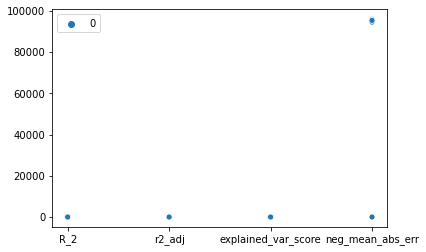

In [345]:
sns.scatterplot(data=df_mm_norm)

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [358]:
# To answer this question, I'm going to split the data into validation and train

In [357]:
from sklearn.model_selection import train_test_split

In [346]:
# A:

model3 = LinearRegression()

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X_everything, y)

In [360]:
model3.fit(X=X_train, y=y_train)

LinearRegression()

In [356]:
from sklearn.model_selection import train_test_split

In [361]:
model3_predicts = model3.predict(X_test)

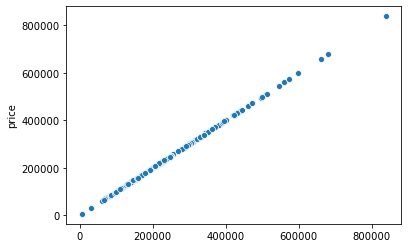

In [362]:
sns.scatterplot(model3_predicts, y_test)

In [363]:
# I think the created model was , overfit because it shows a perfect linear relationshi